In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('UNSW-all.csv')
df_label = pd.DataFrame(df.label)

# Arrange Data into Features Matrix and Target Vector
#X = df.loc[:, df.columns != 'label']
#y = df.loc[:, 'label'].values

#df_train = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_training-set.csv')
#df_test = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_testing-set.csv')

In [5]:
df_label.describe()

,label
count,257673.000000
mean,0.639077
std,0.480269
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
del df['Unnamed: 0']
del df['id']

In [7]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [8]:
df.attack_cat = df.attack_cat.apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')

class2idx = {
    'Normal':0,
    'Attack':1,      
}

idx2class = {v: k for k, v in class2idx.items()}

df['attack_cat'].replace(class2idx, inplace=True)


# !!! WICHTIG ATACK_CAT IST GLEICH LABEL

In [9]:
df['attack_cat'].describe()

count    257673.000000
mean          0.639077
std           0.480269
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: attack_cat, dtype: float64

In [10]:
df['label'].describe()

count    257673.000000
mean          0.639077
std           0.480269
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [11]:
df = df.drop('label', axis = 1)
category_col = ['proto', 'service', 'state', 'is_ftp_login', 'is_sm_ips_ports']
numerical_col = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']
num_feature = df.drop(category_col,axis = 1)

X = num_feature.iloc[:, 0:-1]
y = num_feature.iloc[:, -1]

In [12]:
#del num_feature['Unnamed: 0']
#del num_feature['id']
num_feature

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,attack_cat
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,1,1,1,0,0,1,1,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,1,1,1,1,2,0,0,1,6,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,1,2,1,1,3,0,0,2,6,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,1,2,1,1,3,1,0,2,1,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,1,2,2,1,40,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,2,2,1,1,2,0,0,2,1,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,1,2,1,1,1,0,0,3,2,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,2,1,1,1,1,0,0,1,1,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,2,1,1,1,1,0,0,1,1,0


In [13]:
#del X['Unnamed: 0']
#del X['id']
X

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,1,0,1,1,1,1,0,0,1,1
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,43,1,1,1,1,2,0,0,1,6
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,7,1,2,1,1,3,0,0,2,6
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,1,1,2,1,1,3,1,0,2,1
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,43,1,2,2,1,40,0,0,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,1,2,2,1,1,2,0,0,2,1
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,1,1,2,1,1,1,0,0,3,2
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,2,1,1,1,1,0,0,1,1
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,2,1,1,1,1,0,0,1,1


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Name: attack_cat, Length: 257673, dtype: int64

In [15]:
#X_train = num_feature[num_feature.attack_cat==0].sample(10000)
X_train = num_feature.sample(10000)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop('attack_cat', axis = 1)

##############
## Split into train+val and test
##############

X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
149673,2.682322,22,22,1194,1642,16.030887,62,252,3.400039e+03,4676.544922,...,1,1,1,1,1,1,1,0,1,1
64077,0.000010,2,0,850,0,100000.002500,254,0,3.400000e+08,0.000000,...,4,2,1,1,1,2,0,0,3,2
157493,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,32,2,17,17,10,32,0,0,17,32
188635,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,43,2,25,25,25,43,0,0,26,43
53924,0.715241,10,6,864,268,20.971952,254,252,8.701962e+03,2505.449219,...,2,1,2,2,1,3,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104901,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,4,2,2,2,2,5,0,0,2,4
77144,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,0.000000,...,4,2,2,2,2,4,0,0,2,4
240427,2.749438,24,20,1585,1044,15.639560,254,252,4.419812e+03,2886.407959,...,8,1,1,1,1,1,0,0,2,4
169979,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,17,2,20,17,17,17,0,0,17,17


In [17]:
y_train

149673    1
64077     1
157493    1
188635    1
53924     1
         ..
104901    1
77144     1
240427    1
169979    1
50234     1
Name: attack_cat, Length: 10000, dtype: int64

In [18]:
X_val

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
150801,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000e+00,...,32,2,33,32,17,33,0,0,32,32
132501,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000e+00,...,29,2,12,12,12,29,0,0,12,29
164575,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000e+00,...,22,2,17,17,17,22,0,0,18,22
8383,0.024262,38,40,2438,19266,3173.687264,31,29,7.827879e+05,6.194048e+06,...,6,0,3,1,1,2,0,0,6,3
140410,0.000002,2,0,220,0,500000.001300,254,0,4.400000e+08,0.000000e+00,...,4,2,3,3,1,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178028,0.400177,12,22,876,22808,82.463509,62,252,1.605290e+04,4.352474e+05,...,2,1,1,2,1,1,0,1,5,1
31626,6.789980,446,858,25056,1094788,191.900420,31,29,2.945517e+04,1.288384e+06,...,7,0,2,2,1,5,0,0,2,9
111523,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000e+00,...,2,2,2,2,2,2,0,0,2,2
46966,1.394000,6,2,978,86,5.021521,62,252,4.677188e+03,2.467719e+02,...,8,3,1,1,1,4,0,0,2,4


In [19]:
##############
## Min/Max Scaling
##############

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val) # 
#X_test = scaler.transform(X_test)

#X_train, y_train = np.array(X_train), np.array(y_train)
#X_val, y_val = np.array(X_val), np.array(y_val)
#X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
149673,2.682322,22,22,1194,1642,16.030887,62,252,3.400039e+03,4676.544922,...,1,1,1,1,1,1,1,0,1,1
64077,0.000010,2,0,850,0,100000.002500,254,0,3.400000e+08,0.000000,...,4,2,1,1,1,2,0,0,3,2
157493,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,32,2,17,17,10,32,0,0,17,32
188635,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,43,2,25,25,25,43,0,0,26,43
53924,0.715241,10,6,864,268,20.971952,254,252,8.701962e+03,2505.449219,...,2,1,2,2,1,3,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104901,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,4,2,2,2,2,5,0,0,2,4
77144,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,0.000000,...,4,2,2,2,2,4,0,0,2,4
240427,2.749438,24,20,1585,1044,15.639560,254,252,4.419812e+03,2886.407959,...,8,1,1,1,1,1,0,0,2,4
169979,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,17,2,20,17,17,17,0,0,17,17


In [21]:
X_val

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
150801,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000e+00,...,32,2,33,32,17,33,0,0,32,32
132501,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000e+00,...,29,2,12,12,12,29,0,0,12,29
164575,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000e+00,...,22,2,17,17,17,22,0,0,18,22
8383,0.024262,38,40,2438,19266,3173.687264,31,29,7.827879e+05,6.194048e+06,...,6,0,3,1,1,2,0,0,6,3
140410,0.000002,2,0,220,0,500000.001300,254,0,4.400000e+08,0.000000e+00,...,4,2,3,3,1,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178028,0.400177,12,22,876,22808,82.463509,62,252,1.605290e+04,4.352474e+05,...,2,1,1,2,1,1,0,1,5,1
31626,6.789980,446,858,25056,1094788,191.900420,31,29,2.945517e+04,1.288384e+06,...,7,0,2,2,1,5,0,0,2,9
111523,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000e+00,...,2,2,2,2,2,2,0,0,2,2
46966,1.394000,6,2,978,86,5.021521,62,252,4.677188e+03,2.467719e+02,...,8,3,1,1,1,4,0,0,2,4


In [22]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
149673,2.682322,22,22,1194,1642,16.030887,62,252,3.400039e+03,4676.544922,...,1,1,1,1,1,1,1,0,1,1
64077,0.000010,2,0,850,0,100000.002500,254,0,3.400000e+08,0.000000,...,4,2,1,1,1,2,0,0,3,2
157493,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,32,2,17,17,10,32,0,0,17,32
188635,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,43,2,25,25,25,43,0,0,26,43
53924,0.715241,10,6,864,268,20.971952,254,252,8.701962e+03,2505.449219,...,2,1,2,2,1,3,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104901,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,4,2,2,2,2,5,0,0,2,4
77144,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,0.000000,...,4,2,2,2,2,4,0,0,2,4
240427,2.749438,24,20,1585,1044,15.639560,254,252,4.419812e+03,2886.407959,...,8,1,1,1,1,1,0,0,2,4
169979,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,17,2,20,17,17,17,0,0,17,17


Text(0.5, 1.0, 'Class Distribution in Test Set')

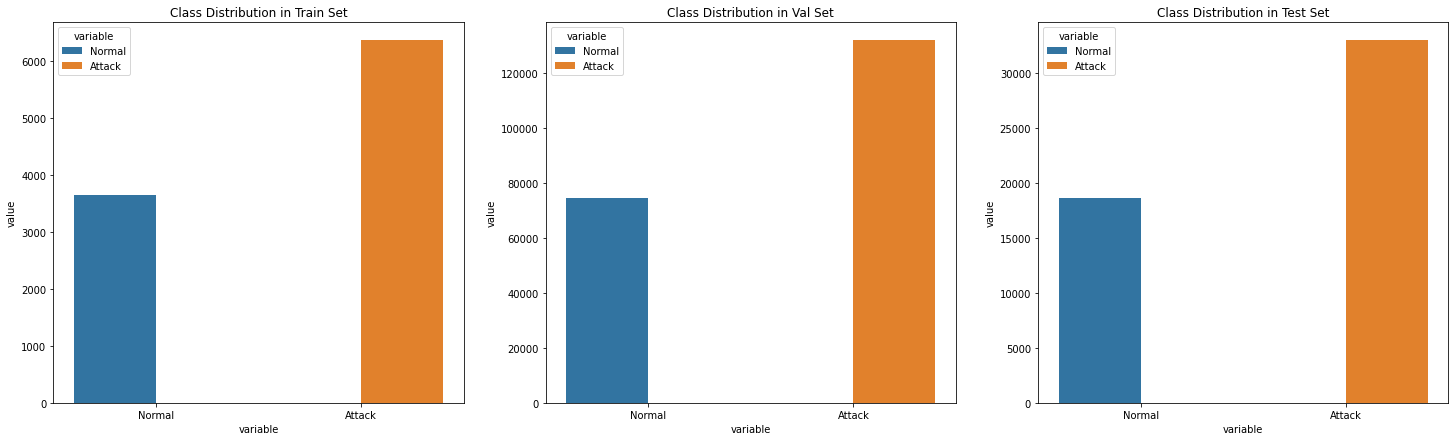

In [23]:
def get_class_distribution(obj):
    count_dict = {
        'Normal':0,
        'Attack':1,        
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Normal'] += 1
        elif i == 1: 
            count_dict['Attack'] += 1        
        else:
            print("Check classes.")
            
    return count_dict

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [24]:
#float(X_train['rate'])

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [26]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
149673,2.682322,22,22,1194,1642,16.030887,62,252,3.400039e+03,4676.544922,...,1,1,1,1,1,1,1,0,1,1
64077,0.000010,2,0,850,0,100000.002500,254,0,3.400000e+08,0.000000,...,4,2,1,1,1,2,0,0,3,2
157493,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,32,2,17,17,10,32,0,0,17,32
188635,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,43,2,25,25,25,43,0,0,26,43
53924,0.715241,10,6,864,268,20.971952,254,252,8.701962e+03,2505.449219,...,2,1,2,2,1,3,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104901,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,4,2,2,2,2,5,0,0,2,4
77144,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,0.000000,...,4,2,2,2,2,4,0,0,2,4
240427,2.749438,24,20,1585,1044,15.639560,254,252,4.419812e+03,2886.407959,...,8,1,1,1,1,1,0,0,2,4
169979,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,17,2,20,17,17,17,0,0,17,17


In [27]:
#del X_train['attack_cat']

In [28]:
rf = RandomForestClassifier(n_estimators=400,random_state=10,criterion='gini', max_leaf_nodes=80, max_depth=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_leaf_nodes=80, n_estimators=400,
                       random_state=10)

In [29]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
149673,2.682322,22,22,1194,1642,16.030887,62,252,3.400039e+03,4676.544922,...,1,1,1,1,1,1,1,0,1,1
64077,0.000010,2,0,850,0,100000.002500,254,0,3.400000e+08,0.000000,...,4,2,1,1,1,2,0,0,3,2
157493,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,32,2,17,17,10,32,0,0,17,32
188635,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,43,2,25,25,25,43,0,0,26,43
53924,0.715241,10,6,864,268,20.971952,254,252,8.701962e+03,2505.449219,...,2,1,2,2,1,3,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104901,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,4,2,2,2,2,5,0,0,2,4
77144,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,0.000000,...,4,2,2,2,2,4,0,0,2,4
240427,2.749438,24,20,1585,1044,15.639560,254,252,4.419812e+03,2886.407959,...,8,1,1,1,1,1,0,0,2,4
169979,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,17,2,20,17,17,17,0,0,17,17


In [30]:
X_test

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
147200,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000e+00,...,29,2,6,6,6,29,0,0,6,29
22250,0.031928,72,74,4238,63516,4541.468430,31,29,1.047357e+06,1.569982e+07,...,7,0,4,1,1,1,0,0,2,6
11528,0.003120,6,8,320,1826,4166.666655,31,29,6.846154e+05,4.097436e+06,...,3,0,3,1,1,5,0,0,4,2
118913,1.158363,12,10,1466,808,18.129032,254,252,9.282064e+03,5.027785e+03,...,2,1,1,1,1,2,0,0,1,3
87119,0.000003,2,0,168,0,333333.321500,254,0,2.240000e+08,0.000000e+00,...,3,2,1,1,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,0.707798,108,114,9504,12298,312.235975,31,29,1.064258e+05,1.377907e+05,...,2,0,2,1,1,1,0,0,2,1
140590,0.000005,2,0,180,0,200000.005100,254,0,1.440000e+08,0.000000e+00,...,4,2,3,4,3,3,0,0,4,3
242974,2.043880,14,14,756,768,13.210169,254,252,2.747715e+03,2.794685e+03,...,2,1,2,1,1,2,0,0,1,2
109699,1.135932,10,8,1082,354,14.965685,254,252,6.859566e+03,2.183229e+03,...,3,1,1,1,1,2,0,0,2,2


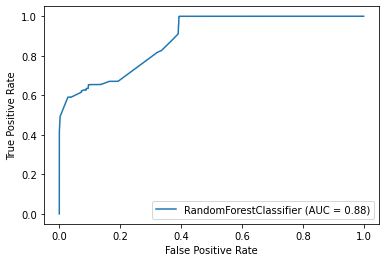

In [31]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

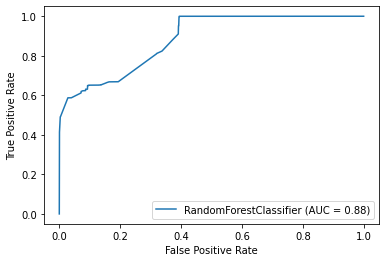

In [32]:
rf_disp = plot_roc_curve(rf, X_val, y_val)
plt.show()